In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7, 6)})

In [11]:
days = 50
mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100


current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

for day in range(days):
    
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'test'

    
    user_data = pd.concat([user_data, day_data_experiment, day_data_control])
    fit = stats.ttest_ind(user_data[user_data.group == 'test'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = pd.concat([stat_result, (pd.DataFrame({'t': [fit[0]], 'p-value': [fit[1]], 'date': current_date}))])
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = pd.concat([daily_data, current_data_stat])
    
    current_date += 1

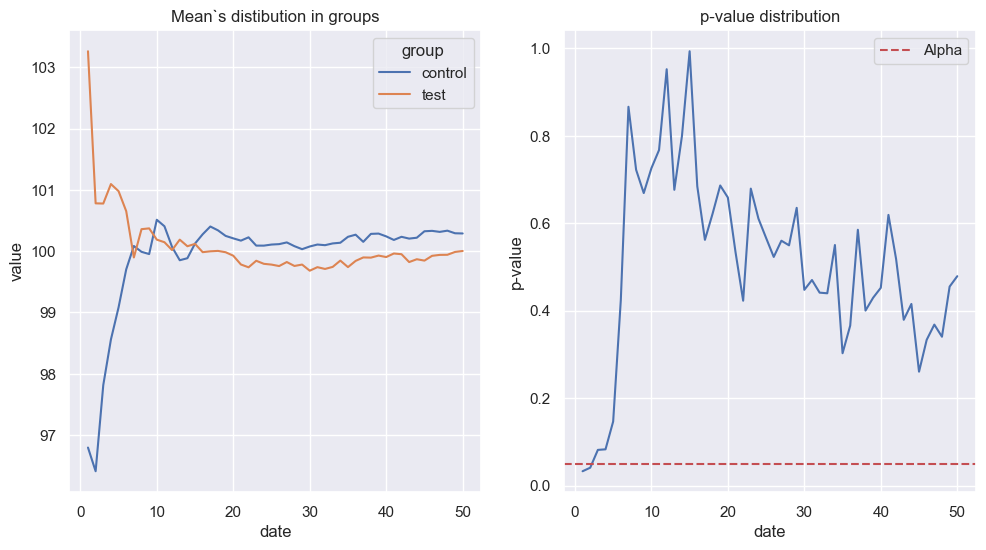

In [12]:
fig, axes = plt.subplots(1,2)
sns.lineplot(data=daily_data, x="date", y="value", hue='group', ax=axes[0]).set_title('Mean`s distibution in groups')
sns.lineplot(data=stat_result, x="date", y="p-value", ax=axes[1]).set_title('p-value distribution')
axes[1].axhline(y=0.05, color='r', linestyle='--', label='Alpha')

axes[1].legend()
plt.show()